<a href="https://colab.research.google.com/github/PX2145-2025/week-2-b-Lester-Finley/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1**


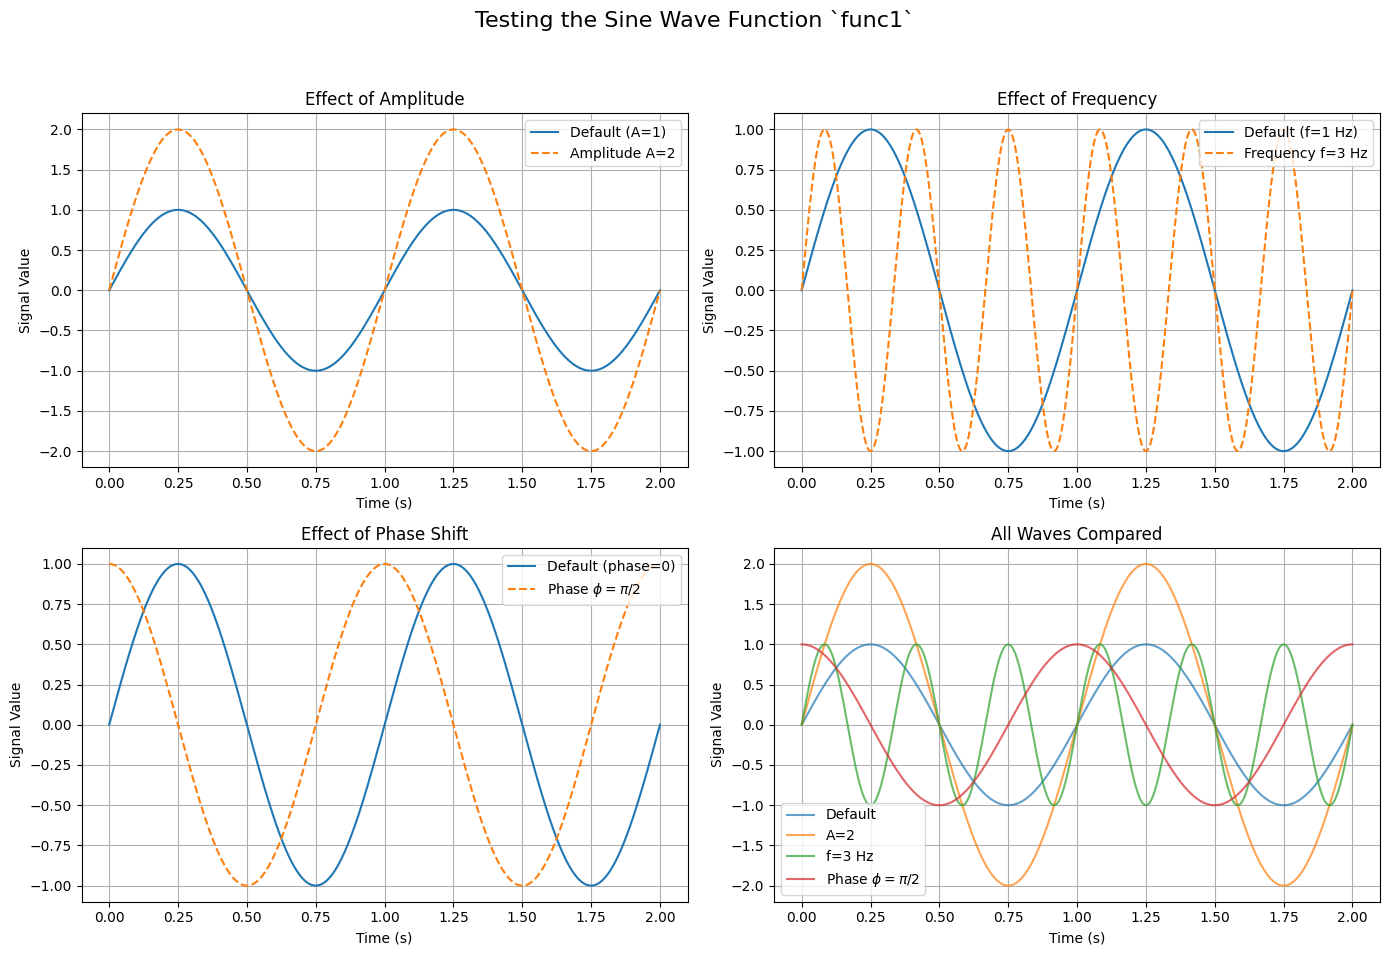

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func1(time, amplitude=1, frequency=1, phase=0):
    return amplitude * np.sin(2 * np.pi * frequency * time + phase)

time_array = np.linspace(0, 2, 500)

y_default = func1(time_array)

y_amplitude = func1(time_array, amplitude=2)

y_frequency = func1(time_array, frequency=3)

y_phase = func1(time_array, phase=np.pi / 2)

plt.figure(figsize=(14, 10))
plt.suptitle('Testing the Sine Wave Function `func1`', fontsize=16)

plt.subplot(2, 2, 1)
plt.plot(time_array, y_default, label='Default (A=1)')
plt.plot(time_array, y_amplitude, label='Amplitude A=2', linestyle='--')
plt.title('Effect of Amplitude')
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time_array, y_default, label='Default (f=1 Hz)')
plt.plot(time_array, y_frequency, label='Frequency f=3 Hz', linestyle='--')
plt.title('Effect of Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(time_array, y_default, label='Default (phase=0)')
plt.plot(time_array, y_phase, label=r'Phase $\phi=\pi/2$', linestyle='--')
plt.title('Effect of Phase Shift')
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(time_array, y_default, label='Default', alpha=0.7)
plt.plot(time_array, y_amplitude, label='A=2', alpha=0.7)
plt.plot(time_array, y_frequency, label='f=3 Hz', alpha=0.7)
plt.plot(time_array, y_phase, label=r'Phase $\phi=\pi/2$', alpha=0.7)
plt.title('All Waves Compared')
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.grid(True)
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Exercise 2**

A satellite has a circular orbit around the Earth with a period  𝑇 .

1.)

$F_g = F_c$

$\frac{GMm}{r^2} = \frac{mv^2}{r}$

$\frac{GM}{r} = v^2$

$v = \frac{2\pi r}{T}$

$\frac{GM}{r} = (\frac{2\pi r}{T})^2 = \frac{4\pi^2r^2}{T^2}$

$GMT^2 = 4\pi^2r^3$

$r^3 = (\frac{GMT^2}{4\pi^2})^\frac{1}{3}$

$h + R = (\frac{GMT^2}{4\pi^2})^\frac{1}{3}$

$h = (\frac{GMT^2}{4\pi^2})^\frac{1}{3} - R$

2.)
3.)
4.)

In [2]:
import numpy as np

def calculate_altitude(T_seconds):

    G = 6.674e-11
    M = 5.972e24
    R = 6.371e6

    term = (G * M * T_seconds**2) / (4 * np.pi**2)
    r = np.cbrt(term)
    h = r - R

    return h

T_str = input("Please input a time period in seconds: \n")
T = float(T_str)
h = calculate_altitude(T) / 1000

print(f"The altitude of the satellite is {h:.2f} km.")


print("\n--- Specific Orbital Cases ---")

T_geo_seconds = 24 * 60 * 60
h_geo = calculate_altitude(T_geo_seconds) / 1000
print(f"Altitude for a geosynchronous (24-hour) orbit: {h_geo:.2f} km")

T_90min_seconds = 90 * 60
h_90min = calculate_altitude(T_90min_seconds) / 1000
print(f"Altitude for a 90-minute orbit: {h_90min:.2f} km")

T_45min_seconds = 45 * 60
h_45min = calculate_altitude(T_45min_seconds) / 1000
print(f"Altitude for a 45-minute orbit: {h_45min:.2f} km")

Please input a time period in seconds: 
10000000
The altitude of the satellite is 996816.44 km.

--- Specific Orbital Cases ---
Altitude for a geosynchronous (24-hour) orbit: 35869.07 km
Altitude for a 90-minute orbit: 281.39 km
Altitude for a 45-minute orbit: -2180.25 km


# **Exercise 3**

In [ ]:
%%writefile fitting_utils.py
import numpy as np

def linfit(x, y):

    x = np.array(x)
    y = np.array(y)

    N = len(x)

    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x**2)

    delta = N * sum_x2 - sum_x**2

    m = (N * sum_xy - sum_x * sum_y) / delta
    c = (sum_x2 * sum_y - sum_x * sum_xy) / delta

    residuals = y - (m * x + c)

    sigma_y = np.sqrt(np.sum(residuals**2) / (N - 2))

    m_err = sigma_y * np.sqrt(N / delta)
    c_err = sigma_y * np.sqrt(sum_x2 / delta)

    return m, c, m_err, c_err

Overwriting fitting_utils.py


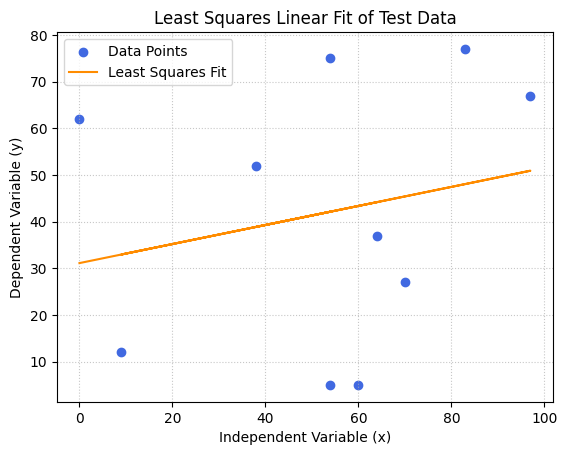

The slope is: 0.2040547242618152
The intercept is: 31.105505086549975
The slope error is: 0.3249336858390948
The intercept error is: 19.563868390212868


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import fitting_utils as fu
import random

x_data = [random.randrange(0, 100, 1) for _ in range(10)]
y_data = [random.randrange(0, 100, 1) for _ in range(10)]

m_fit, c_fit, m_err, c_err = fu.linfit(x_data, y_data)

plt.scatter(x_data, y_data, label='Data Points', color='royalblue', marker='o')
plt.plot(x_data, [m_fit * x + c_fit for x in x_data], label='Least Squares Fit', color='darkorange')
plt.xlabel("Independent Variable (x)")
plt.ylabel("Dependent Variable (y)")
plt.title("Least Squares Linear Fit of Test Data")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

plt.show()

print("The slope is:", m_fit)
print("The intercept is:", c_fit)
print("The slope error is:", m_err)
print("The intercept error is:", c_err)